# GRIP @ The Spark Foundation
# Data Science and Business Analytics Intern
## Author: Vikram Khanzode
## Task 2: Prediction Using Unsupervise ML

### Importing Packages

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
import sklearn.cluster as cluster

### Loading Iris Dataset

In [45]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimal K for K-means Clustering using the elbow method

In [46]:
x = dataframe_iris.iloc[:, [0, 1, 2, 3]].values

K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(x)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

### Within Cluster Sum of Squares (WSS) for each value of K 

In [47]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182
5,6,39.039987
6,7,34.356017
7,8,30.063111
8,9,28.177734
9,10,25.849464


### WSS vs K Graph

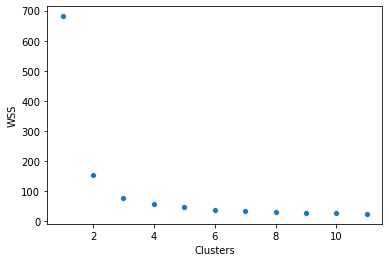

In [48]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="o")

### The Elbow of the graph is found at K=3 
### Therefore, K=3 is the optimal number of clusters to apply K-Means Clustering

## K-Means Clustering Implementation of Iris Dataset for K=3

### Stage 1: Initializing

### Creating a DataFrame Structure

In [49]:
df_1 = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

In [50]:
df_1

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


### Initializing the Centroids

In [51]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df_1.loc[df_1['cluster'] == i]['x'].mean())
    result_list.append(df_1.loc[df_1['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [52]:
centroids

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

### Plotting Points

Text(0, 0.5, 'Sepal Width')

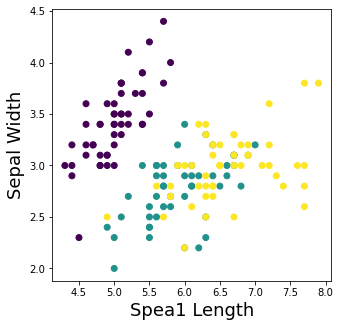

In [53]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_1['x'], df_1['y'], c=iris.target)
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

### Defining Colors for each Cluster and Ploting the Initial Clusters

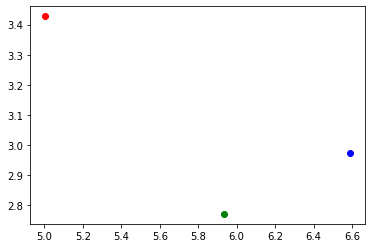

In [54]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

### Showing Complete Graph

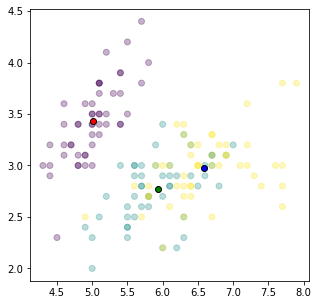

In [55]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_1['x'], df_1['y'], c=iris.target,alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

### Stage 2: Assignment Stage

### Assignment Function: Calculating the distance and updating the DataFrame

In [56]:
def assignment(df_1, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df_1['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df_1['x'] - centroids[i][0]) ** 2
                + (df_1['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df_1['closest'] = df_1.loc[:, centroid_distance_cols].idxmin(axis=1)
    df_1['closest'] = df_1['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df_1['color'] = df_1['closest'].map(lambda x: colmap[x])
    return df_1

In [57]:
df_1 = assignment(df_1, centroids)

In [58]:
df_1

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,g
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b


### Visualization of Clusters with Colors

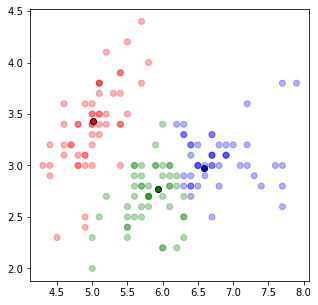

In [59]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_1['x'], df_1['y'], color=df_1['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

### Stage 3: Updating the Centroids

In [60]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df_1[df_1['closest'] == i]['x'])
        centroids[i][1] = np.mean(df_1[df_1['closest'] == i]['y'])
    return k

In [61]:
centroids = update(centroids)
centroids

{0: [5.009433962264151, 3.3830188679245285],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333333, 3.06875]}

### Visualizing the Graph with the Updated Centroids

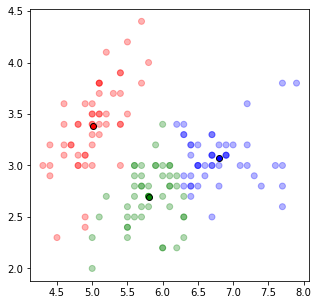

In [62]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_1['x'], df_1['y'], color=df_1['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

### Repeat Assigment Stage to reassign the points with Clusters

In [63]:
df_1 = assignment(df_1, centroids)

### Visulaizing the Updated Graph

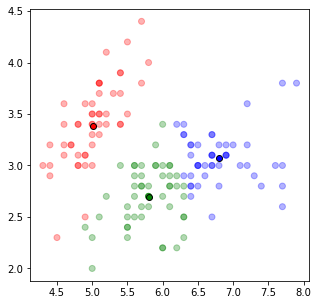

In [64]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_1['x'], df_1['y'], color=df_1['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

### Repeat Cluster Reassignment until they cease to change further 

In [65]:
while True:
    closest_centroids = df_1['closest'].copy(deep=True)
    centroids = update(centroids)
    df_1 = assignment(df_1, centroids)
    if closest_centroids.equals(df_1['closest']):
        break

### Final Result:

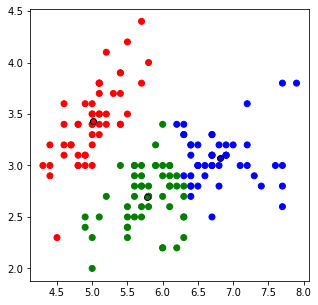

In [67]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_1['x'], df_1['y'], color=df_1['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')


plt.show()